In [ ]:
!pip install textblob pandas matplotlib
!python -m textblob.download_corpora



[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


Step 1: Upload File

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving test.ft.txt.bz2 to test.ft.txt.bz2


Step 2: Convert Data to CSV

In [ ]:
import pandas as pd

# Read first 500 lines for faster processing
lines = []
with open('test.ft.txt.bz2', 'rb') as f:
    import bz2
    decompressed = bz2.open(f, mode='rt')
    for i, line in enumerate(decompressed):
        if i >= 500:  # Limit to 500 lines
            break
        parts = line.strip().split(' ', 1)
        if len(parts) == 2:
            label = parts[0].replace('__label__', '')
            review = parts[1]
            lines.append((label, review))

# Create DataFrame
df = pd.DataFrame(lines, columns=['label', 'review'])

# Save as CSV
df.to_csv('reviews.csv', index=False)

print(df.head())


  label                                             review
0     2  Great CD: My lovely Pat has one of the GREAT v...
1     2  One of the best game music soundtracks - for a...
2     1  Batteries died within a year ...: I bought thi...
3     2  works fine, but Maha Energy is better: Check o...
4     2  Great for the non-audiophile: Reviewed quite a...


Step 3: Perform Sentiment Analysis

   label                                             review  Sentiment Score  \
0      2  Great CD: My lovely Pat has one of the GREAT v...         0.172917   
1      2  One of the best game music soundtracks - for a...         0.148958   
2      1  Batteries died within a year ...: I bought thi...         0.533333   
3      2  works fine, but Maha Energy is better: Check o...         0.472222   
4      2  Great for the non-audiophile: Reviewed quite a...         0.301935   

  Sentiment Label  
0        Positive  
1        Positive  
2        Positive  
3        Positive  
4        Positive  


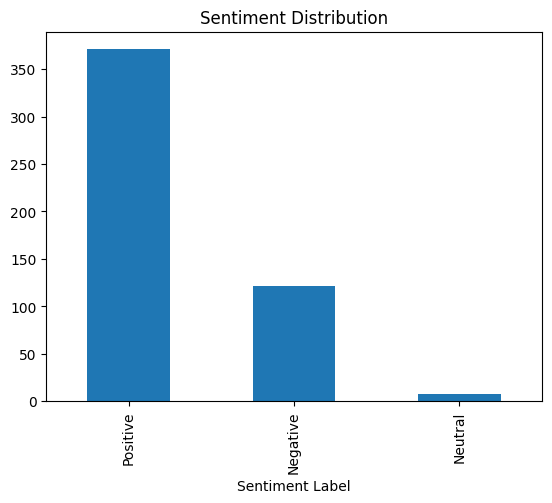

In [ ]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

# Load the new CSV
df = pd.read_csv('reviews.csv')

# Function to calculate sentiment polarity
def get_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity

# Apply sentiment analysis
df['Sentiment Score'] = df['review'].apply(get_sentiment)
df['Sentiment Label'] = df['Sentiment Score'].apply(
    lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral')
)

# Show sample results
print(df.head())

# Plot sentiment distribution
df['Sentiment Label'].value_counts().plot(kind='bar', title='Sentiment Distribution')
plt.show()


Step 4: Save the results

In [ ]:
df.to_csv('sentiment_results.csv', index=False)


In [ ]:
from google.colab import files
files.download('sentiment_results.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Step 5: Visualizations

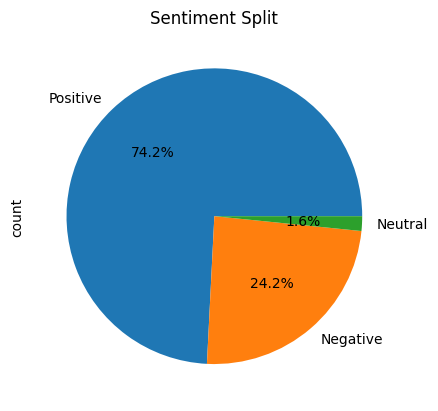

In [ ]:
df['Sentiment Label'].value_counts().plot.pie(autopct='%1.1f%%', title='Sentiment Split')
plt.show()
